In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:

from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

In [3]:
# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - acc: 0.5305 - loss: 0.6921 - val_acc: 0.5500 - val_loss: 0.6882
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8836 - loss: 0.6676 - val_acc: 0.6000 - val_loss: 0.6891
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9594 - loss: 0.6462 - val_acc: 0.6000 - val_loss: 0.6886
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9617 - loss: 0.6285 - val_acc: 0.6500 - val_loss: 0.6889
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9734 - loss: 0.6111 - val_acc: 0.6000 - val_loss: 0.6891
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9578 - loss: 0.5969 - val_acc: 0.6000 - val_loss: 0.6889
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9836 - loss: 0.5757 - val_acc: 0.5000 - val_loss: 0.6885
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9937 - loss: 0.5606 - val_acc: 0.5000 - val_loss: 0.6886
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 1.0000 - loss: 0.5421 - va

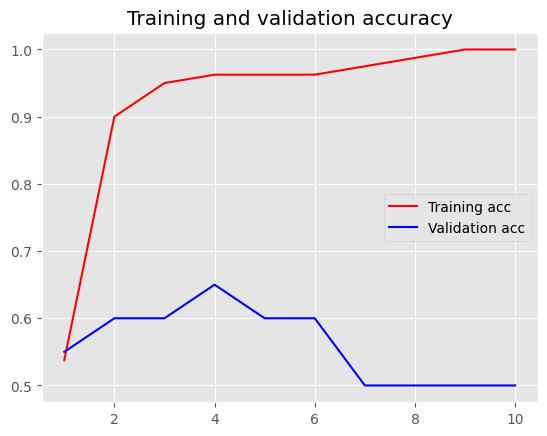

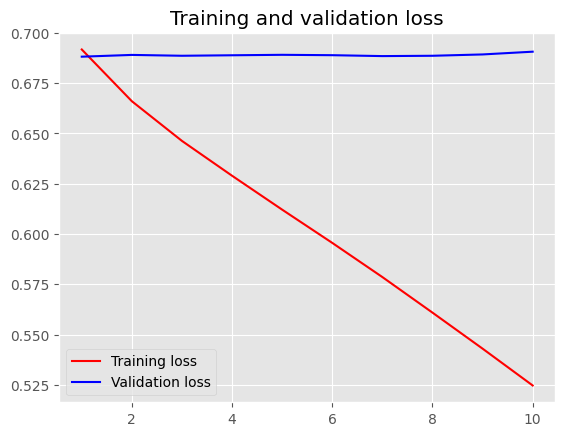

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, validation_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5045 - loss: 0.6941
Test loss: 0.6943135261535645
Test accuracy: 0.5016000270843506


In [6]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]


In [7]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.5181 - loss: 0.6926 - val_acc: 0.5690 - val_loss: 0.6874
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7451 - loss: 0.6672 - val_acc: 0.6850 - val_loss: 0.6585
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8307 - loss: 0.6005 - val_acc: 0.7540 - val_loss: 0.5911
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8578 - loss: 0.4929 - val_acc: 0.7790 - val_loss: 0.5207
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8886 - loss: 0.3879 - val_acc: 0.7940 - val_loss: 0.4690
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9204 - loss: 0.3023 - val_acc: 0.8010 - val_loss: 0.4409
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9456 - loss: 0.2363 - val_acc: 0.8070 - val_loss: 0.4214
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9623 - loss: 0.1894 - val_acc: 0.8140 - val_loss: 0.4139
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

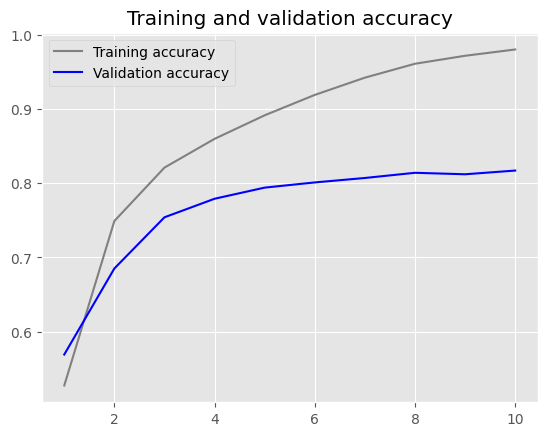

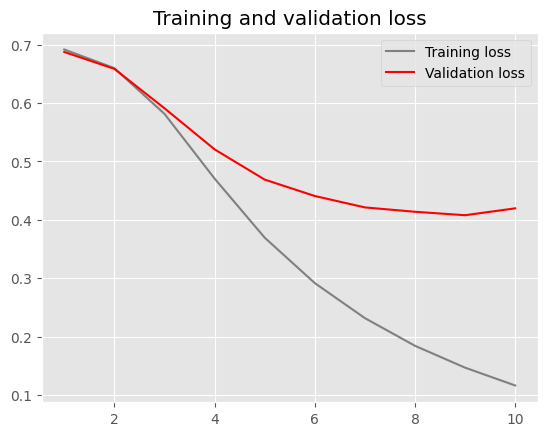

In [8]:
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, validation_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8163 - loss: 0.3956
Test loss: 0.39216989278793335
Test accuracy: 0.8180400133132935


In [10]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [11]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.4596 - loss: 0.6946 - val_acc: 0.5600 - val_loss: 0.6919
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7672 - loss: 0.6777 - val_acc: 0.5700 - val_loss: 0.6910
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8833 - loss: 0.6603 - val_acc: 0.5750 - val_loss: 0.6898
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9098 - loss: 0.6406 - val_acc: 0.5850 - val_loss: 0.6881
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9505 - loss: 0.6125 - val_acc: 0.6150 - val_loss: 0.6857
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9694 - loss: 0.5787 - val_acc: 0.6200 - val_loss: 0.6827
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9668 - loss: 0.5434 - val_acc: 0.6250 - val_loss: 0.6787
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9727 - loss: 0.5031 - val_acc: 0.6150 - val_loss: 0.6741
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9731 - loss:

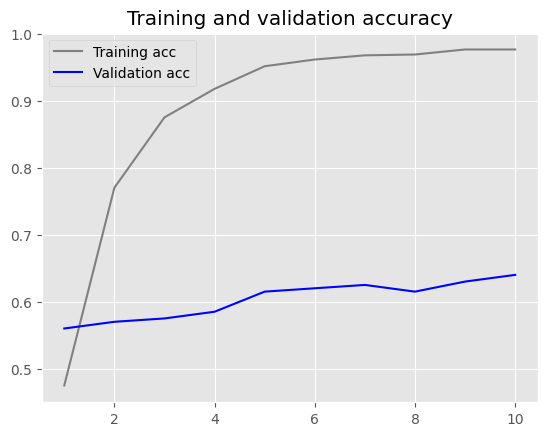

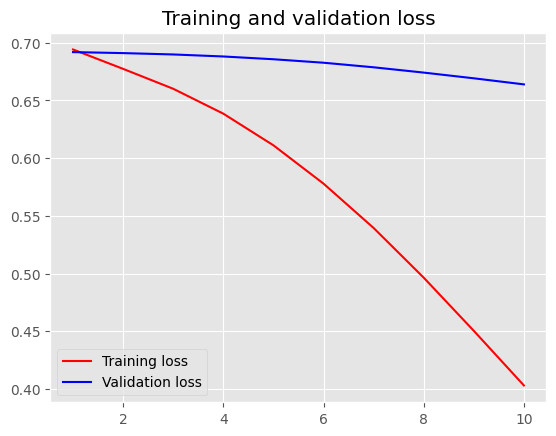

In [12]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, validation_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [13]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5918 - loss: 0.6712
Test loss: 0.6706543564796448
Test accuracy: 0.5911999940872192


In [14]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [15]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.5270 - loss: 0.6911 - val_acc: 0.6850 - val_loss: 0.6639
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7695 - loss: 0.6134 - val_acc: 0.7790 - val_loss: 0.5035
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8449 - loss: 0.4313 - val_acc: 0.8345 - val_loss: 0.3887
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8883 - loss: 0.3190 - val_acc: 0.8580 - val_loss: 0.3434
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9169 - loss: 0.2522 - val_acc: 0.8605 - val_loss: 0.3258
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9323 - loss: 0.2054 - val_acc: 0.8640 - val_loss: 0.3193
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9487 - loss: 0.1699 - val_acc: 0.8655 - val_loss: 0.3185
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9578 - loss: 0.1402 - val_acc: 0.8630 - val_loss: 0.3218
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

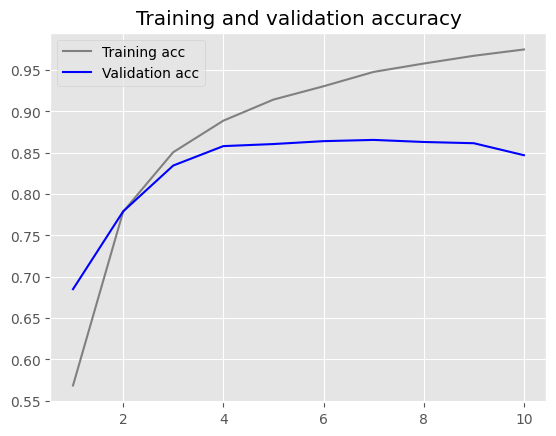

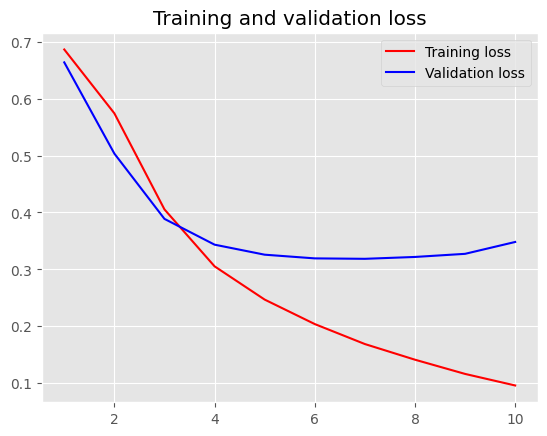

In [16]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, validation_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [17]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8443 - loss: 0.3513
Test loss: 0.34977105259895325
Test accuracy: 0.8475599884986877


In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  21.3M      0  0:00:03  0:00:03 --:--:-- 21.3M


In [19]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

length2 = 150  # Cut off review after 150 words
train_data = 100  # Training sample 100
valid_data = 10000  # Validation sample 10000
words = 10000  # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Split data into training and validation set, but shuffle it, since samples are ordered:
# all negatives first, then all positives
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [22]:
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension based on matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size based on matrix

# Define the model with an Embedding layer initialized with the embedding matrix
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False  # Set trainable to False directly if you want it non-trainable
    )
)

# Check the model summary to confirm the embedding layer has loaded weights
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension from matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size from matrix

# Define the model
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False
    )
)
model.add(GlobalAveragePooling1D())  # Reduces 3D tensor to 2D
model.add(Dense(1, activation='sigmoid'))  # Final output layer for binary classification

# Compile and fit the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model.save_weights('pre_trained_glove_model.weights.h5')



Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 706ms/step - acc: 0.5432 - loss: 0.6900 - val_acc: 0.5780 - val_loss: 0.6877
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 435ms/step - acc: 0.5952 - loss: 0.6857 - val_acc: 0.5666 - val_loss: 0.6874
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - acc: 0.6435 - loss: 0.6824 - val_acc: 0.5258 - val_loss: 0.6880
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - acc: 0.6176 - loss: 0.6807 - val_acc: 0.5030 - val_loss: 0.6897
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - acc: 0.5921 - loss: 0.6788 - val_acc: 0.5032 - val_loss: 0.6893
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - acc: 0.6244 - loss: 0.6721 - val_acc: 0.5026 - val_loss: 0.6910
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.6035 - loss: 0.6734 - val_acc: 0.5029 - val_loss: 0.6895
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.6004 - loss: 0.6768 - val_acc: 0.5026 - val_loss: 0.6918
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.5933 - loss: 

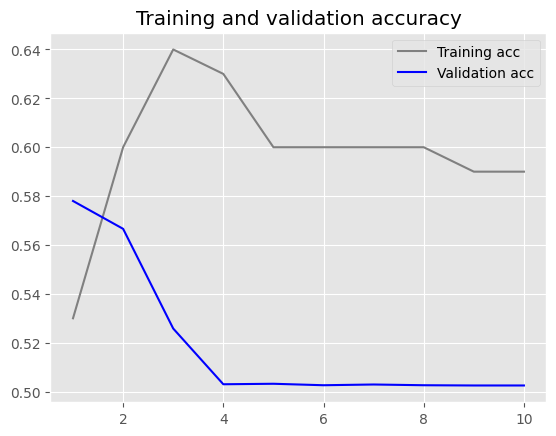

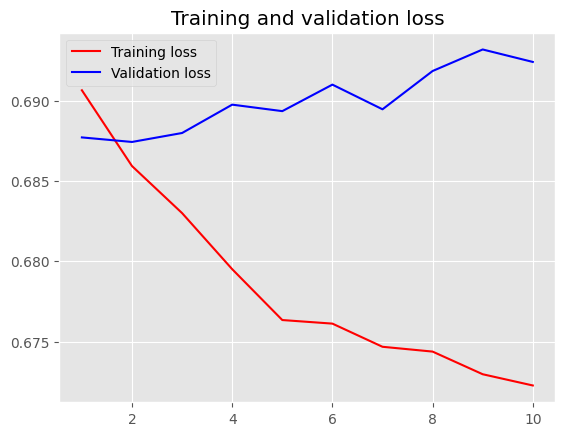

In [26]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:

test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.4927 - loss: 0.7051
Test loss: 0.702895998954773
Test accuracy: 0.5


In [28]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

# Build the model explicitly by specifying an input shape
model11.build(input_shape=(None, length2))

# Load pretrained weights
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile and fit the model
model11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model11.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 591ms/step - acc: 0.4917 - loss: 3.5316 - val_acc: 0.5026 - val_loss: 0.7638
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - acc: 0.6973 - loss: 0.5566 - val_acc: 0.5138 - val_loss: 0.7881
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 0.7782 - loss: 0.4312 - val_acc: 0.5041 - val_loss: 1.4336
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.7349 - loss: 0.5039 - val_acc: 0.5510 - val_loss: 0.6946
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - acc: 0.9908 - loss: 0.1320 - val_acc: 0.5055 - val_loss: 1.0619
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 1.0000 - loss: 0.0603 - val_acc: 0.5264 - val_loss: 0.8599
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0337 - val_acc: 0.5140 - val_loss: 1.0205
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - acc: 1.0000 - loss: 0.0337 - val_acc: 0.5704 - val_loss: 0.7238
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - acc: 1.0000 - loss: 

In [29]:

test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.4924 - loss: 1.0694
Test loss: 1.0531560182571411
Test accuracy: 0.49900001287460327


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [31]:
# Force the embedding layer to build its weights by calling build()
model11.layers[0].build(input_shape=(None, length2))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 707ms/step - acc: 0.8071 - loss: 0.7581 - val_acc: 0.5188 - val_loss: 1.0593
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - acc: 1.0000 - loss: 0.0084 - val_acc: 0.5560 - val_loss: 0.8196
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0061 - val_acc: 0.5257 - val_loss: 1.0286
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - acc: 1.0000 - loss: 0.0049 - val_acc: 0.5395 - val_loss: 0.9486
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - acc: 1.0000 - loss: 0.0035 - val_acc: 0.5254 - val_loss: 1.0809
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 1.0000 - loss: 0.0029 - val_acc: 0.5586 - val_loss: 0.8580
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 1.0000 - loss: 0.0026 - val_acc: 0.5341 - val_loss: 1.0494
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0022 - val_acc: 0.5405 - val_loss: 0.9902
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 1.0000 - loss: 

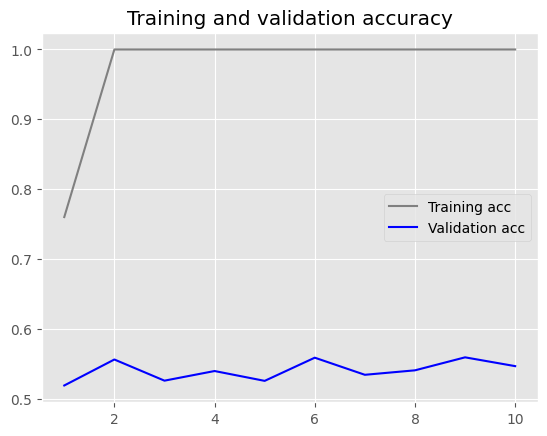

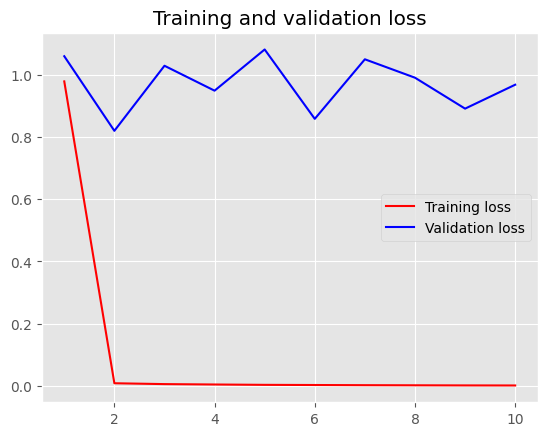

In [32]:
# Build the embedding layer to initialize weights
model11.layers[0].build(input_shape=(None, length2))

# Set the pre-trained embedding matrix as weights for the embedding layer
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile the model
model11.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the weights with the required file name
model11.save_weights('pre_trained_glove_model.weights.h5')

# Plotting training and validation results
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']
epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [33]:

# Evaluate the model
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)

# Print test loss and accuracy
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4952 - loss: 1.1972
Test loss: 1.1810139417648315
Test accuracy: 0.5009599924087524


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - acc: 0.4881 - loss: 1.5828 - val_acc: 0.5044 - val_loss: 0.6932
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.5251 - loss: 0.7133 - val_acc: 0.4905 - val_loss: 0.7191
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.5771 - loss: 0.7047 - val_acc: 0.5061 - val_loss: 0.6978
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.6194 - loss: 0.6659 - val_acc: 0.5027 - val_loss: 0.7511
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.7470 - loss: 0.5356 - val_acc: 0.5036 - val_loss: 1.1129
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8373 - loss: 0.3853 - val_acc: 0.5017 - val_loss: 0.8333
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8590 - loss: 0.3323 - val_acc: 0.4989 - val_loss: 0.8250
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9111 - loss: 0.2267 - val_acc: 0.5002 - val_loss: 1.1424
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9190

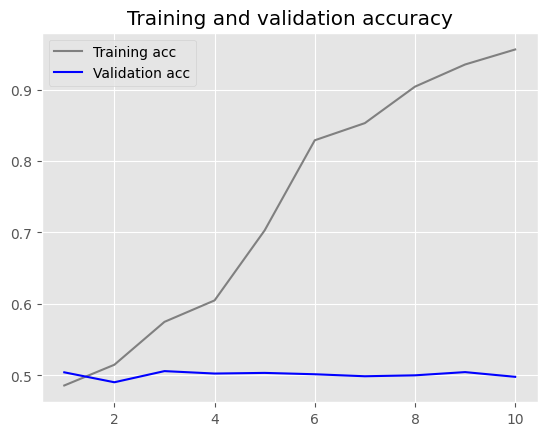

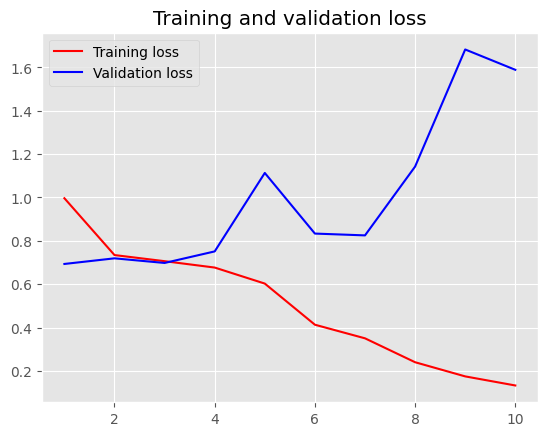

In [34]:
import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100
embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector


model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

# Explicitly build the embedding layer to initialize weights
model12.layers[0].build(input_shape=(None, length))

# Set the pre-trained embedding matrix as weights
model12.layers[0].set_weights([embedd_matrix])
model12.layers[0].trainable = False

# Compile the model
model12.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history12 = model12.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)
model12.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.4930 - loss: 1.5415
Test loss: 1.5326067209243774
Test accuracy: 0.5003200173377991


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4993 - loss: 2.6316 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5215 - loss: 0.6957 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5201 - loss: 0.6931 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5067 - loss: 0.6932 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5384 - loss: 0.6929 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4798 - loss: 0.6932 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4727 - loss: 0.6932 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5072 - loss: 0.6931 - val_accuracy: 0.5040 - v

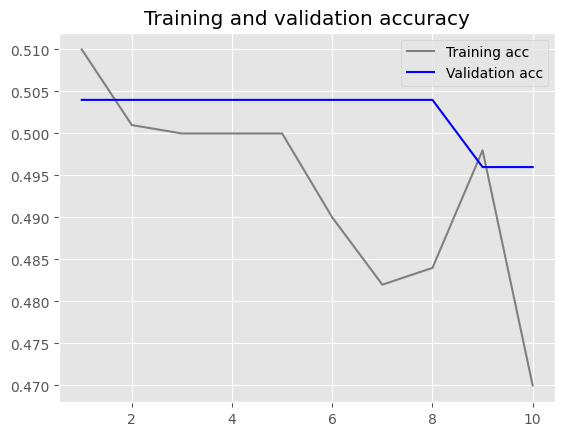

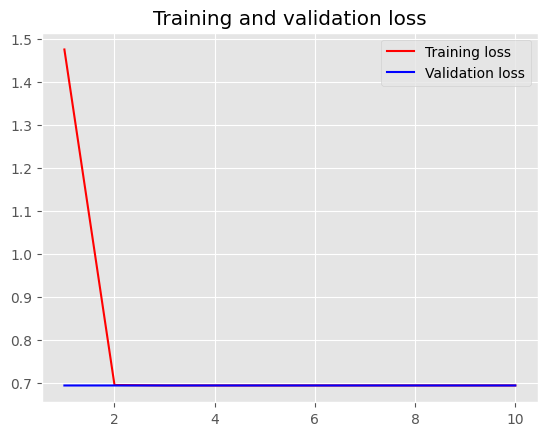

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Define the necessary parameters
words = 10000  # Number of unique words in your vocabulary (adjust as needed)
embedd_dim = 100  # Dimension of the embedding vectors (adjust as needed)
length = 50  # Length of the input sequences (adjust as needed)

# Initialize the embedding matrix (example with random weights, replace with your pre-trained weights)
import numpy as np
embedd_matrix = np.random.rand(words, embedd_dim)  # This should be your pre-trained embedding matrix

# Define the model
model13 = Sequential()
model13.add(Embedding(words, embedd_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

# Build and set the embedding matrix
model13.layers[0].build(input_shape=(None, length))
model13.layers[0].set_weights([embedd_matrix])
model13.layers[0].trainable = False

# Compile the model
model13.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])  # Use 'accuracy' instead of 'acc' for newer versions

# Assuming x_train, y_train, x_val, and y_val are defined and preprocessed
# Train the model
history13 = model13.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

# Save weights
model13.save_weights('pre_trained_glove_model.weights.h5')

# Plot results
import matplotlib.pyplot as plt

accuracy13 = history13.history['accuracy']
valid_acc13 = history13.history['val_accuracy']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']
epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4927 - loss: 0.6932
Test loss: 0.6931468844413757
Test accuracy: 0.5
